In [1]:
import pandas as pd

# Load the dataset to explore its structure and contents
file_path = '/content/vehicles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial inspection
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [2]:
# Summary of the dataset: columns, data types, and missing values
df.info()

# Summary statistics for numerical columns
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning the data
* Remove or impute missing values.
* Handle outliers in the price column.


In [3]:
# Cleaning the data

# Remove rows with 0 or extremely high prices as outliers
df = df[(df['price'] > 500) & (df['price'] < 100000)]

# Impute missing values for numerical columns with median
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)

# Impute missing values for categorical columns with mode
for column in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
               'transmission', 'drive', 'size', 'type', 'paint_color']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Drop unnecessary columns like 'id', 'VIN', and 'region' as they are unlikely to impact price
df_cleaned = df.drop(columns=['id', 'VIN', 'region'])

# Confirm changes
df_cleaned.info()


<ipython-input-3-7955709626aa>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-3-7955709626aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-3-7955709626aa>:8: FutureWarning: A value is trying to be set on

<class 'pandas.core.frame.DataFrame'>
Index: 383068 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         383068 non-null  int64  
 1   year          383068 non-null  float64
 2   manufacturer  383068 non-null  object 
 3   model         383068 non-null  object 
 4   condition     383068 non-null  object 
 5   cylinders     383068 non-null  object 
 6   fuel          383068 non-null  object 
 7   odometer      383068 non-null  float64
 8   title_status  383068 non-null  object 
 9   transmission  383068 non-null  object 
 10  drive         383068 non-null  object 
 11  size          383068 non-null  object 
 12  type          383068 non-null  object 
 13  paint_color   383068 non-null  object 
 14  state         383068 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 46.8+ MB


**Exploratory data analysis (EDA) to investigate relationships between price and the other variables**

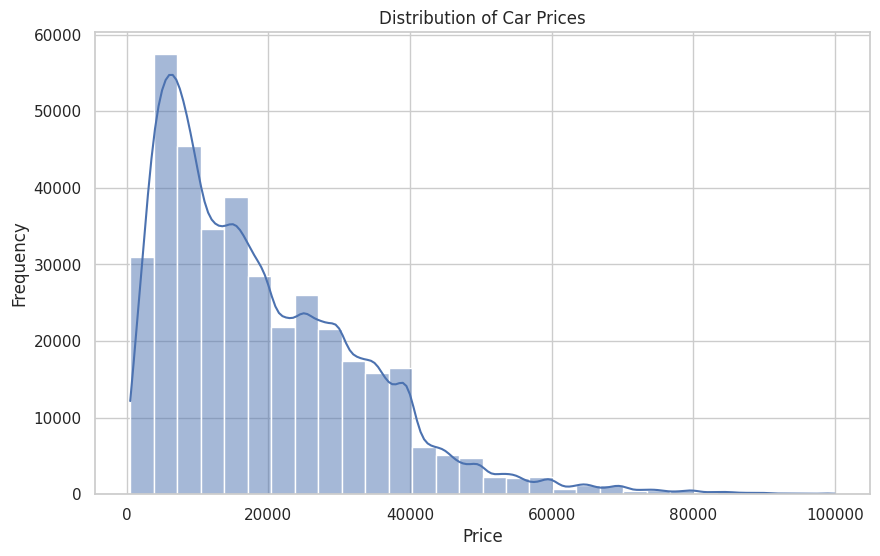

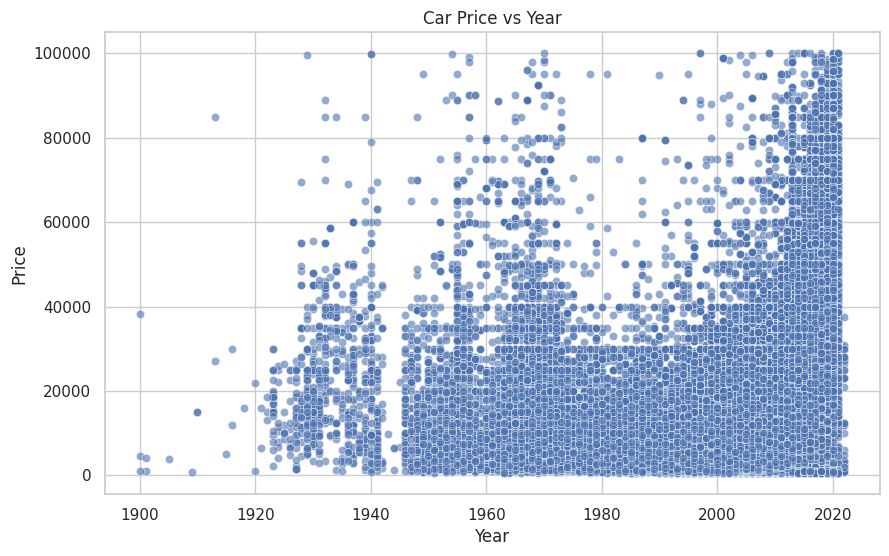

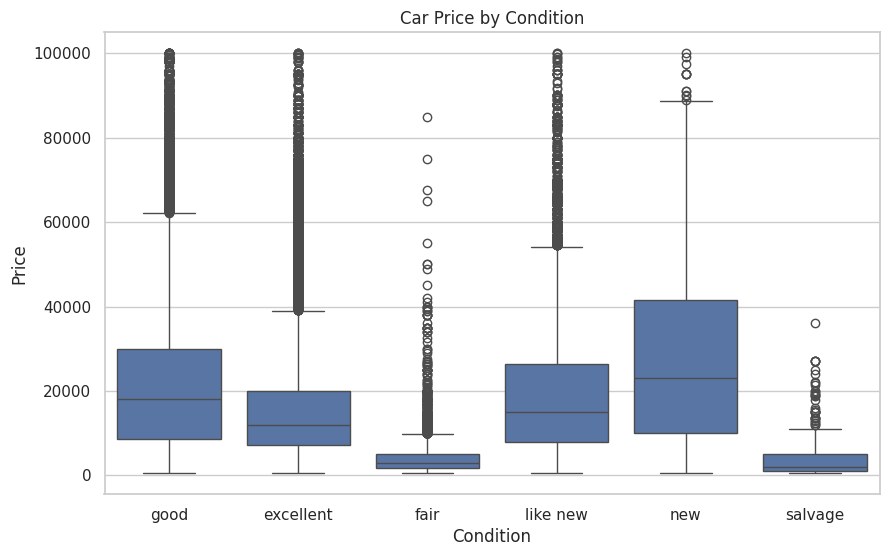

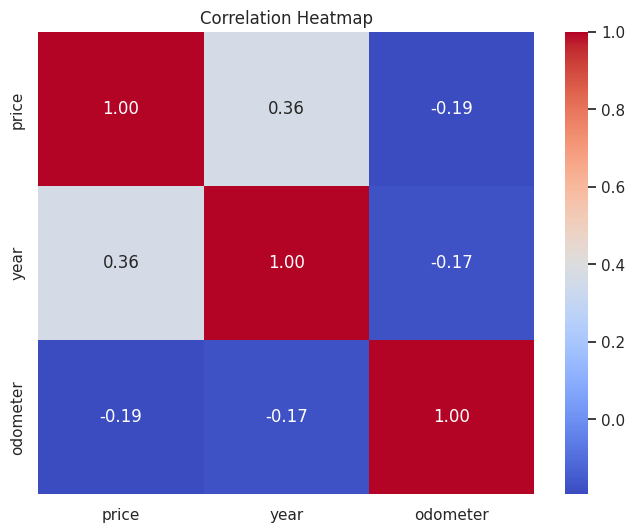

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between price and year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='year', y='price', alpha=0.6)
plt.title('Car Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Boxplot of price by condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='condition', y='price')
plt.title('Car Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

# Correlation heatmap for numerical features
numerical_columns = ['price', 'year', 'odometer']
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


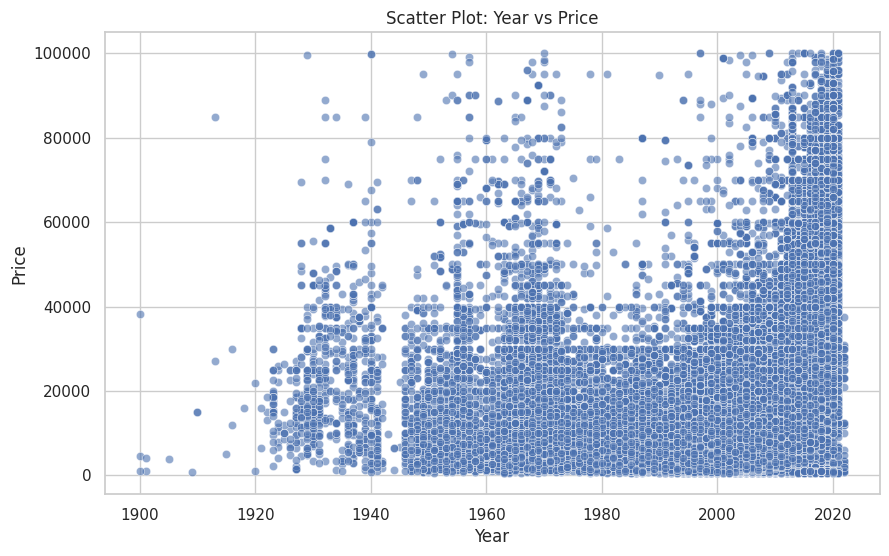

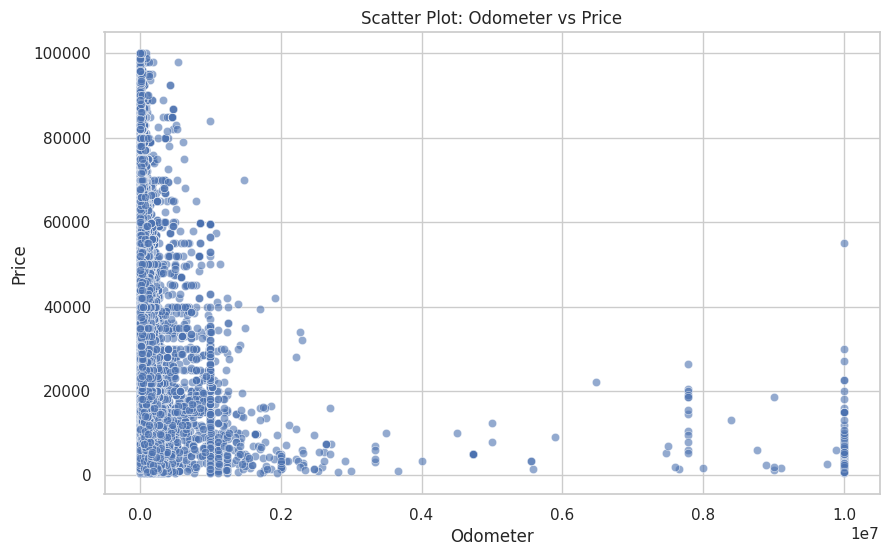

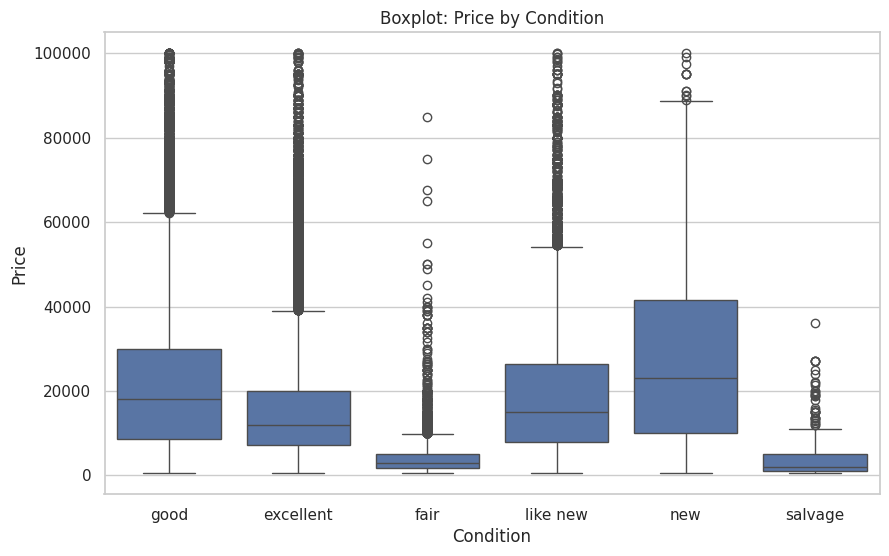

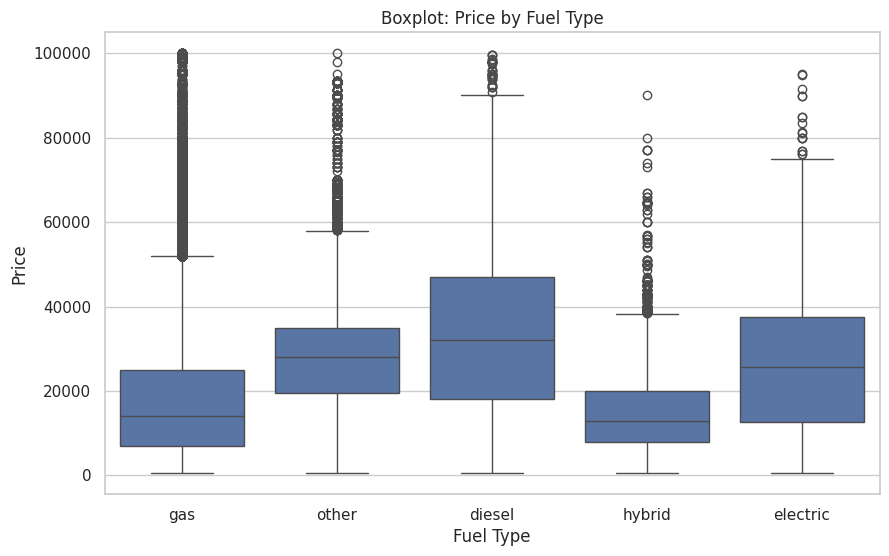

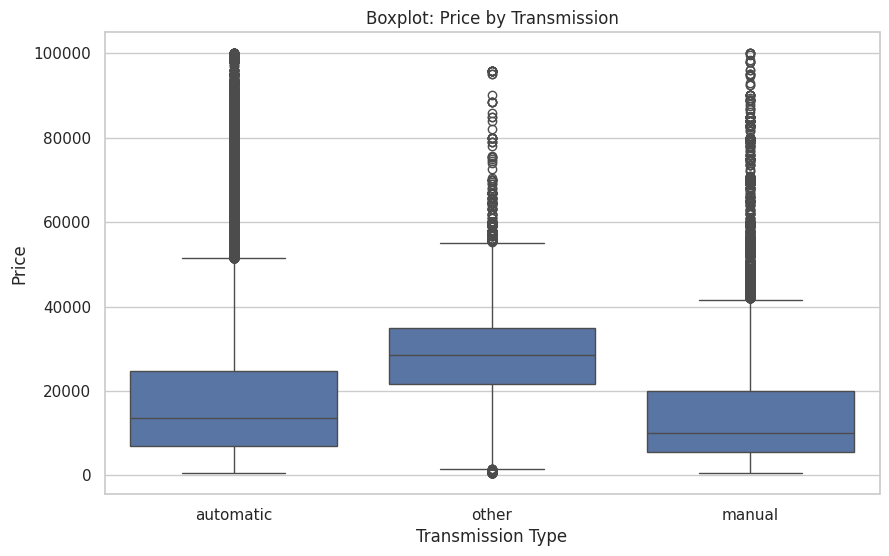

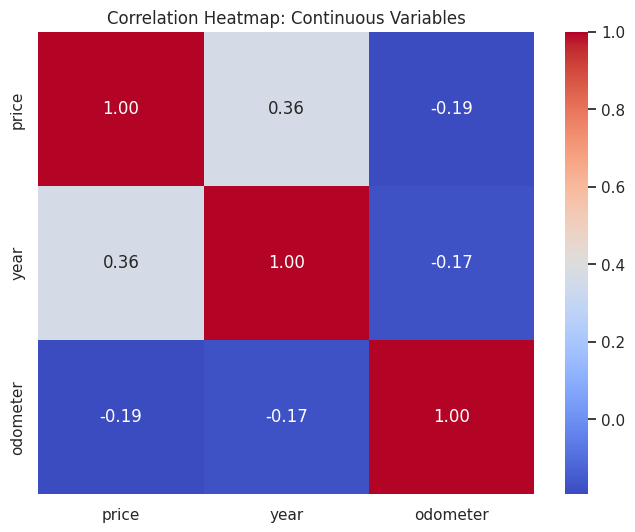

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
df['price'] = df['price'].fillna(df['price'].median())
df['year'] = df['year'].fillna(df['year'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

for col in ['condition', 'fuel', 'transmission']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 1. Scatter Plot: Year vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='price', alpha=0.6)
plt.title('Scatter Plot: Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# 2. Scatter Plot: Odometer vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.6)
plt.title('Scatter Plot: Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# 3. Boxplot: Price by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='condition', y='price')
plt.title('Boxplot: Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

# 4. Boxplot: Price by Fuel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuel', y='price')
plt.title('Boxplot: Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# 5. Boxplot: Price by Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Boxplot: Price by Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

# 6. Correlation Heatmap for Continuous Variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'year', 'odometer']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Continuous Variables')
plt.show()


**Scatter Plots**:

* **Year vs Price:** Indicates a positive relationship where newer cars tend to have higher prices.
* **Odometer vs Price**: Shows a negative relationship; cars with higher mileage are generally priced lower.

**Box Plots**:
* **Condition**: Prices are higher for cars in better condition (like new, excellent).
* **Fuel**: Electric and hybrid cars generally command higher prices compared to gas-powered cars.
* **Transmission**: Automatic transmissions tend to correlate with higher prices.

**Correlation Heatmap**:

* Confirms significant correlations between price and both year (positive) and odometer (negative).

These plots highlight the importance of the features (year, odometer, condition, fuel, and transmission) as predictors of car prices.



---

**Modelling**:

**Use of Multiple Regression Models**

We will train and test multiple regression models:
* Linear Regression
* Ridge Regression
* Lasso Regression

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['year', 'odometer', 'condition', 'fuel', 'transmission']]
y = df['price']

# Encode categorical variables using OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['condition', 'fuel', 'transmission']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Fit models
linear_model.fit(preprocessor.fit_transform(X_train), y_train)
ridge_model.fit(preprocessor.transform(X_train), y_train)
lasso_model.fit(preprocessor.transform(X_train), y_train)

# Evaluate models on the test set
linear_preds = linear_model.predict(preprocessor.transform(X_test))
ridge_preds = ridge_model.predict(preprocessor.transform(X_test))
lasso_preds = lasso_model.predict(preprocessor.transform(X_test))

# Metrics for evaluation
from sklearn.metrics import mean_absolute_error, r2_score

results = {
    'Linear Regression': {
        'MAE': mean_absolute_error(y_test, linear_preds),
        'R2': r2_score(y_test, linear_preds)
    },
    'Ridge Regression': {
        'MAE': mean_absolute_error(y_test, ridge_preds),
        'R2': r2_score(y_test, ridge_preds)
    },
    'Lasso Regression': {
        'MAE': mean_absolute_error(y_test, lasso_preds),
        'R2': r2_score(y_test, lasso_preds)
    }
}

results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.01294e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Linear Regression': {'MAE': 8990.473718812074, 'R2': 0.28841924736868974},
 'Ridge Regression': {'MAE': 8990.488026216184, 'R2': 0.28841856110769637},
 'Lasso Regression': {'MAE': 8990.985835857766, 'R2': 0.28839669111181}}

**Cross-Validation of Models**

* We will use K-fold cross validation to evalute the 3 models.

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for each model
cv_results = {}
for name, model in [('Linear Regression', linear_model),
 ('Ridge Regression', ridge_model),
  ('Lasso Regression', lasso_model)]:
    scores = cross_val_score(model, preprocessor.transform(X_train), y_train,
                             scoring='neg_mean_absolute_error', cv=5)
    cv_results[name] = -np.mean(scores)

cv_results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05546e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Linear Regression': 8933.54568779075,
 'Ridge Regression': 8933.559592855172,
 'Lasso Regression': 8934.02802017503}

**Grid search hyperparameters**

* We will tune the hyperparameters for Ridge and Lasso regression using Grid Search.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_absolute_error', cv=5)
lasso_grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_absolute_error', cv=5)

ridge_grid.fit(preprocessor.transform(X_train), y_train)
lasso_grid.fit(preprocessor.transform(X_train), y_train)

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

{
    'Best Ridge Alpha': ridge_grid.best_params_,
    'Best Lasso Alpha': lasso_grid.best_params_
}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17483e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11997e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.13902e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.15136e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

{'Best Ridge Alpha': {'alpha': 0.1}, 'Best Lasso Alpha': {'alpha': 0.1}}

**Clear identification of evaluation metric**
* Use Mean Absolute Error (MAE) as the primary metric for its interpretability (in terms of price units) and robustness to outliers.
* Use **r-square** as a secondary metric to evaluate how much variance the model explains.

In [9]:
ridge_preds_test = best_ridge.predict(preprocessor.transform(X_test))
lasso_preds_test = best_lasso.predict(preprocessor.transform(X_test))

evaluation_metrics = {
    'Ridge Regression': {
        'MAE': mean_absolute_error(y_test, ridge_preds_test),
        'R2': r2_score(y_test, ridge_preds_test)
    },
    'Lasso Regression': {
        'MAE': mean_absolute_error(y_test, lasso_preds_test),
        'R2': r2_score(y_test, lasso_preds_test)
    }
}

evaluation_metrics


{'Ridge Regression': {'MAE': 8990.475149658376, 'R2': 0.28841917910991977},
 'Lasso Regression': {'MAE': 8990.512215525423, 'R2': 0.288417264174065}}

**Interpretation of evaluation metric**
* The MAE indicates the average absolute difference between the predicted and actual car prices.
* An MAE of approximately 8990 implies that, on average, the model's predictions are off by $8,990 from the true prices.
* Both Ridge and Lasso have very similar MAE values, suggesting they perform nearly identically in terms of minimizing prediction errors.

**R-Square**
* R-Square represents the proportion of variance in the dependent variable (car prices) that the model explains.
* An r-square value of 0.288 indicates that about 28.8% of the variation in car prices is explained by the selected features.



---

**Feature Engineering**
* Add polymonial features

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Add new features to the dataset
current_year = 2024
df['age'] = current_year - df['year']

# Create interaction terms and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X = df[['age', 'odometer', 'condition', 'fuel', 'transmission']]
X_encoded = pd.get_dummies(X, columns=['condition', 'fuel', 'transmission'], drop_first=True)

# Split target variable
y = df['price']

# Calculate the correlation matrix for the original encoded features
correlation_matrix = pd.DataFrame(X_encoded).corr()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation higher than a threshold (e.g., 0.9)
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.9)]

# Drop highly correlated features
X_encoded_reduced = X_encoded.drop(columns=high_correlation_features)

# Add polynomial and interaction terms to the reduced set
X_poly_reduced = poly.fit_transform(X_encoded_reduced)

# Split into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_poly_reduced, y, test_size=0.2, random_state=42)

# Print the number of features in the reduced training set
num_features_reduced = X_train_reduced.shape[1]

# Print statement for the number of features in the reduced training set
print(f"The reduced training dataset contains {num_features_reduced} features.")


# Fit Ridge and Lasso regression models on reduced features
ridge_model_reduced = Ridge(alpha=1.0)

ridge_model_reduced.fit(X_train_reduced, y_train)

# Make predictions
ridge_preds_reduced = ridge_model_reduced.predict(X_test_reduced)

# Evaluate models
ridge_mae_reduced = mean_absolute_error(y_test, ridge_preds_reduced)

ridge_r2_reduced = r2_score(y_test, ridge_preds_reduced)


# Output metrics
metrics_reduced = {
    'Ridge Regression (Reduced Features)': {'MAE': ridge_mae_reduced, 'R2': ridge_r2_reduced}
}

metrics_reduced


The reduced training dataset contains 104 features.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17093e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Ridge Regression (Reduced Features)': {'MAE': 7338.719483837449,
  'R2': 0.4913059528343554}}

**Model Improvements**
* Outlier removal: Remvoe exterme values in price and odometer to improve the preformance of the model
* Feature Scaling: Standardize the features




In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Add new features to the dataset
current_year = 2024
df['age'] = current_year - df['year']

# Outlier Removal: Remove extreme values in price and odometer
price_lower_bound = np.percentile(df['price'], 1)
price_upper_bound = np.percentile(df['price'], 99)
odometer_lower_bound = np.percentile(df['odometer'], 1)
odometer_upper_bound = np.percentile(df['odometer'], 99)

df_filtered = df[(df['price'] >= price_lower_bound) & (df['price'] <= price_upper_bound)]
df_filtered = df_filtered[(df_filtered['odometer'] >= odometer_lower_bound) &
 (df_filtered['odometer'] <= odometer_upper_bound)]

# Create interaction terms and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X = df_filtered[['age', 'odometer', 'condition', 'fuel', 'transmission']]
X_encoded = pd.get_dummies(X, columns=['condition', 'fuel', 'transmission'], drop_first=True)

# Split target variable
y = df_filtered['price']

# Normalize Data: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Add polynomial and interaction terms to the scaled set
X_poly_scaled = poly.fit_transform(X_scaled)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_preds = ridge_model.predict(X_test)

# Evaluate model
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

# Output metrics
metrics = {
    'Ridge Regression': {'MAE': ridge_mae, 'R2': ridge_r2}
}

# Print the metrics
print(metrics)


{'Ridge Regression': {'MAE': 6483.945143514766, 'R2': 0.5609178616076993}}


In [12]:
# Interpret coefficients
feature_names = poly.get_feature_names_out(X_encoded.columns)
coefficients = ridge_model.coef_
coefficients_dict = dict(zip(feature_names, coefficients))

# Output metrics
metrics = {
    'Ridge Regression': {'MAE': ridge_mae, 'R2': ridge_r2}
}

# Print metrics
print(metrics)

# Print top 5 coefficients by absolute value for interpretation
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
print("\nTop 5 Most Influential Features and Coefficients:")
for feature, coef in sorted_coefficients:
    print(f"{feature}: {coef:.4f}")

{'Ridge Regression': {'MAE': 6483.945143514766, 'R2': 0.5609178616076993}}

Top 5 Most Influential Features and Coefficients:
age: -7171.5973
odometer: -5173.0524
age fuel_gas: 2530.3573
fuel_gas transmission_other: 2526.0697
fuel_gas^2: 2192.9349




---
**Explanation of Top 5 Most Influential Features and Coefficients**

1. age: -7171.60
* Older cars significantly reduce the price, as indicated by the large negative coefficient. This aligns with the depreciation that occurs as cars age.

2. odometer: -5173.05
* Higher mileage also substantially lowers car prices. The negative coefficient reflects that cars with more usage (miles driven) are valued less.

3. age × fuel_gas: 2530.36
* This interaction suggests that older gas-powered vehicles have a moderate positive impact on price, possibly due to demand in markets where gas-powered vehicles remain the norm.

4. fuel_gas × transmission_other: 2526.07
* Gasoline vehicles with alternative transmission types (e.g., manual or uncommon variants) slightly increase prices, potentially due to niche demand.

5. fuel_gas^2: 2192.93
* The quadratic term for fuel_gas shows a non-linear positive effect, indicating some gas-powered vehicles might have higher values due to other correlated factors (e.g., brand or condition).